<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/jledeus/Lab-7/jledeus-lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Optimization and learning**
**Johan Ledéus**

# **Introduction**

Homework 7 for DD2363 Methods in Scientific Computing


# Methods

## Mandatory assignments

###1. Function: Gradient descent method in $R^n$ 

####Input: objective function $f(x)$ 
####Output: stationary point $x*$ such that $|| grad(f)(x*) || < TOL$
####Test: verify accuracy and convergence with respect to exact solution 

#### Solution
Gradient descent method finds a stationary point for a function $f$ by going in the opposite direction of the gradient.  Meaning that it will find a local minimum of the function $f$. The reason for that is that the gradient of the function points in a direction that will increase the function.

The basic algorthm is: 
$$x_{k+1} = x_k - \alpha\nabla f(x_k)$$ where $\alpha$
 is the step size.
 
 The step size $\alpha$ could either be fixed or be different at each iteration. The important aspect is that it's not too large thus the algorithm might diverge.
 
 One approach is to use **Barzilai and Borwein**
 
 $$\Delta g(x) = \nabla f(x_i) - \nabla f(x_{i-1}) $$
 
 $$\alpha = \frac{\nabla g(x)^T \Delta x}{\nabla g(x)^T\nabla g(x)}$$
 
 #### References
 
 [onmyphd](http://www.onmyphd.com/?p=gradient.descent)

In [0]:
import numpy as np

# Rough approximation of the gradient
def grad(f,x,h=1e-6):
  if type(x) is np.ndarray:
    res = np.zeros(x.shape)
    for i in range(len(x)):
      x_temp = x.copy()
      x_temp[i] += h
      res[i] = (f(x_temp)-f(x))/h
    return res
  else:
    return (f(x+h)-f(x))/h


def gradient_descent_method_rn(f,x):
  alpha = 0.001
  X = []
  while np.linalg.norm(grad(f,x)) > 1e-4:
    x = x - alpha*grad(f,x) # Move in the negative gradient
    X.append(x)
  return x, X


# Results

### Gradient descent method in $R^n$ 
For the stepping alpha I choose the fixed step size since it was good enough and converged.

#### 1D
For the 1D case i choose the function $f(x) = x^4 - 2x^3 - 4$ which has a stationary point at $3/2$.

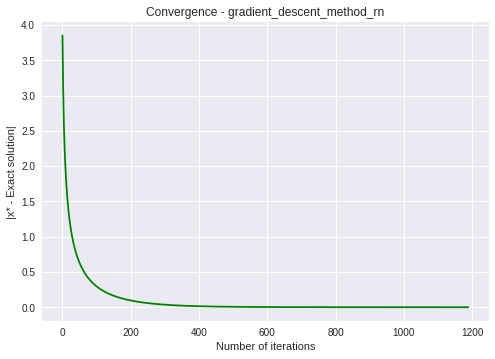

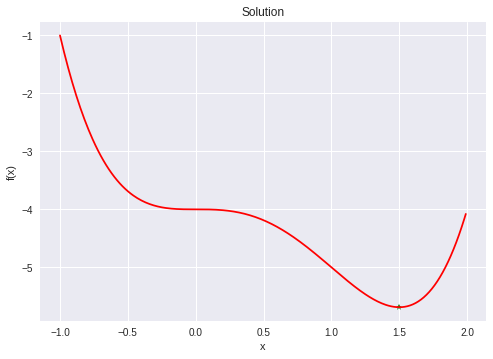

In [2]:
f = lambda x : x**4 - 2*x**3 - 4
x, X = gradient_descent_method_rn(f,6)

import matplotlib.pyplot as plt
plt.plot(range(0, len(X)), [np.abs(x-3/2) for x in X], 'g')
plt.title('Convergence - gradient_descent_method_rn')
plt.ylabel('|x* - Exact solution|')
plt.xlabel('Number of iterations')
plt.show()


plt.plot(x, f(x), 'g*')
X = np.arange(-1,2,0.01)
plt.plot(X, [f(x) for x in X], 'r')
plt.title('Solution')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()
  
  

####2D

$f(x,y) = 2x^2 + 0.5(y-2)^2 -3$ has trivially the solution $(0,2)$ for gradient descent.

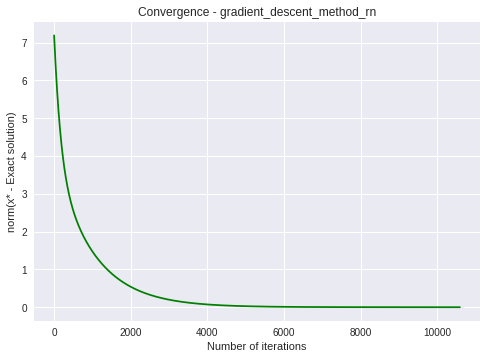

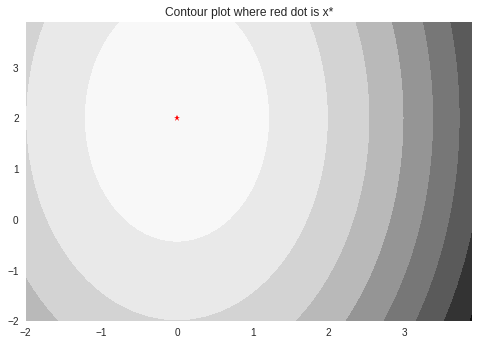

In [3]:
f = lambda x : 2*x[0]**2 + 0.5*(x[1]-2)**2 - 3
res, X_res = gradient_descent_method_rn(f,np.array([6.0,6.0]))

# Convergence plot
import matplotlib.pyplot as plt
plt.plot(range(0, len(X_res)), [np.linalg.norm(x-np.array([0,2])) for x in X_res], 'g')
plt.title('Convergence - gradient_descent_method_rn')
plt.ylabel('norm(x* - Exact solution)')
plt.xlabel('Number of iterations')
plt.show()


from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111)

# the function that I'm going to plot
def z_func(x,y):
  return 2*x**2 + 0.5*(y-2)**2 - 3
 
x = np.arange(-2.0,4.0,0.1)
y = np.arange(-2.0,4.0,0.1)
X,Y = np.meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid
ax.contourf(X,Y,Z)
ax.plot(res[0],res[1], 'r*')
plt.title('Contour plot where red dot is x*')
plt.show()
  

# Discussion

The results for the gradient descent was accurate for 1d and 2d. It was easy to get intuition for the method but it was somewhat hard to understand how the step size will affect the convergence until I found external resources.